In [1]:
import pandas as pd

# Load the dataset
df =pd.read_csv ("Amazon Sale Report.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [2]:
# Checking missing values in each column
missing_values = df.isnull().sum()


In [3]:
# Display the missing values to understand where cleaning is needed
missing_values

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

Currency: 7,800 missing values.
Amount: 7,800 missing values, aligned with currency.
Ship-city, ship-state, ship-postal-code, ship-country: 35 missing values each.
Fulfilled-by: A large portion of the data is missing (89,713 missing values).
New and PendingS columns: Both have no data (100% missing).

The columns "New" and "PendingS" are completely empty and should be dropped.

# Next Steps:

Drop irrelevant columns: Remove "New" and "PendingS" as they contain no useful data.

Handle missing values:
For currency and Amount, we can investigate patterns of missing values and decide whether to drop or impute them.
For ship-city, ship-state, ship-postal-code, ship-country, I will either fill the missing values based on other related columns or drop the rows with missing values.


Proceed with Exploratory Data Analysis (EDA): After cleaning, we'll move on to analyze trends in sales, category, and geography.

In [4]:
df_cleaned = df.drop(columns=['New', 'PendingS'])

In [5]:
df_cleaned = df_cleaned.dropna(subset=['currency', 'Amount'])

In [6]:
df_cleaned = df_cleaned.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'])

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121143 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121143 non-null  int64  
 1   Order ID            121143 non-null  object 
 2   Date                121143 non-null  object 
 3   Status              121143 non-null  object 
 4   Fulfilment          121143 non-null  object 
 5   Sales Channel       121143 non-null  object 
 6   ship-service-level  121143 non-null  object 
 7   Category            121143 non-null  object 
 8   Size                121143 non-null  object 
 9   Courier Status      121143 non-null  object 
 10  Qty                 121143 non-null  int64  
 11  currency            121143 non-null  object 
 12  Amount              121143 non-null  float64
 13  ship-city           121143 non-null  object 
 14  ship-state          121143 non-null  object 
 15  ship-postal-code    121143 non-nul

In [8]:
descriptive_stats = df_cleaned.describe()
descriptive_stats

,index,Qty,Amount,ship-postal-code
count,121143.000000,121143.000000,121143.000000,121143.000000
mean,64486.312655,0.961252,648.576874,463623.724507
std,37220.415404,0.214276,281.196896,191301.588170
min,0.000000,0.000000,0.000000,110001.000000
25%,32294.500000,1.000000,449.000000,382421.000000
50%,64477.000000,1.000000,605.000000,500032.000000
75%,96682.500000,1.000000,788.000000,600020.000000
max,128974.000000,8.000000,5584.000000,989898.000000


Above dataset has been cleaned

Dataset Summary:
Total Records after Cleaning: 121,143 entries.
Key Columns with Descriptive Stats:
Order Quantities (Qty): The majority of the orders have 1 item per order.
Amount: The average order value is approximately $648.57, with the maximum reaching $5,584.

# Next Steps:

1.Sales Overview: We'll analyze overall sales trends, including:
2.Total sales amount
3.Distribution of sales across categories
4.Product Analysis: We'll identify best-selling products/categories, including:
5.Top categories by sales
6.Quantity sold per category
7.Fulfillment Analysis: We'll check the distribution of fulfillment methods.
8.Geographical Analysis: We'll analyze the sales data across various regions (states/cities/countries)

In [10]:
# Sales Overview: Total Sales Amount and Sales Distribution by Category
total_sales = df_cleaned['Amount'].sum()


In [11]:
# Sales distribution across categories
sales_by_category = df_cleaned.groupby('Category')['Amount'].sum().sort_values(ascending=False)

In [12]:
# Top categories by quantity sold
quantity_by_category = df_cleaned.groupby('Category')['Qty'].sum().sort_values(ascending=False)

In [13]:
# Displaying total sales and sales by category
total_sales, sales_by_category.head(), quantity_by_category.head()

(78570548.25,
 Category
 T-shirt     39197808.65
 Shirt       21289304.08
 Blazzer     11214369.12
 Trousers     5344813.30
 Perfume       789419.66
 Name: Amount, dtype: float64,
 Category
 T-shirt     45217
 Shirt       44954
 Blazzer     13938
 Trousers     9891
 Perfume      1051
 Name: Qty, dtype: int64)

 ## Sales Overview Insights:
Total Sales Amount: The overall sales amount in the dataset is $78,570,548.25.

Top Categories by Sales Amount:

T-shirt: $39,197,808.65 (highest-selling category).
Shirt: $21,289,304.08.
Blazer: $11,214,369.12.
Top Categories by Quantity Sold:

T-shirt: 45,217 units sold.
Shirt: 44,954 units sold.
Blazer: 13,938 units sold.

## fulfillment analysis and geographical analysis to provide more insights

In [14]:
# Fulfillment Analysis: Distribution of fulfillment methods
fulfillment_distribution = df_cleaned['fulfilled-by'].value_counts()

In [15]:
# Geographical Analysis: Sales by country
sales_by_country = df_cleaned.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)

In [16]:
# Display the top fulfillment methods and sales by country
fulfillment_distribution.head(), sales_by_country.head()

(Easy Ship    37514
 Name: fulfilled-by, dtype: int64,
 ship-country
 IN    78570548.25
 Name: Amount, dtype: float64)

## Fulfillment and Geographical Insights:
Fulfillment Methods:
The majority of orders are fulfilled by Easy Ship with a total of 37,514 orders.
Geographical Distribution:
All sales in the dataset are from India (IN), contributing to the entire sales amount of $78,570,548.25.
These insights indicate that the primary market is in India, and Easy Ship is the dominant fulfillment method.

 ## Visual Analysis

In [19]:
import matplotlib.pyplot as plt

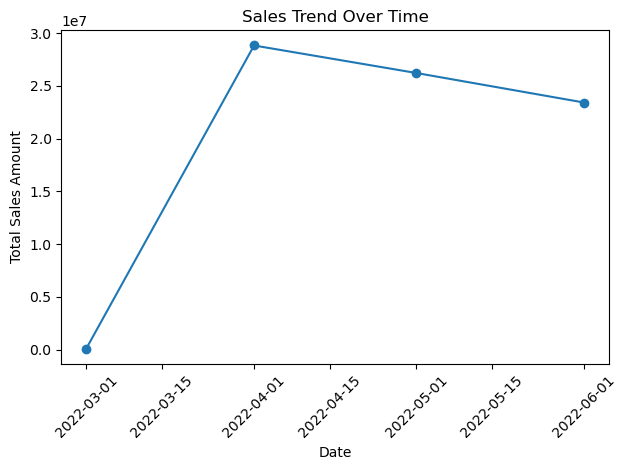

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group data by month for sales trend analysis
sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
sales_trend['Date'] = sales_trend['Date'].dt.to_timestamp()

# Plot: Sales Trend Over Time
plt.plot(sales_trend['Date'], sales_trend['Amount'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here's the first visualization showing the Sales Trend Over Time, which provides insight into how sales amounts fluctuate across different periods. You can observe peaks and declines, helping identify the best and worst sales periods.

## Generate insights for product category distribution, fulfillment method, geographical analysis

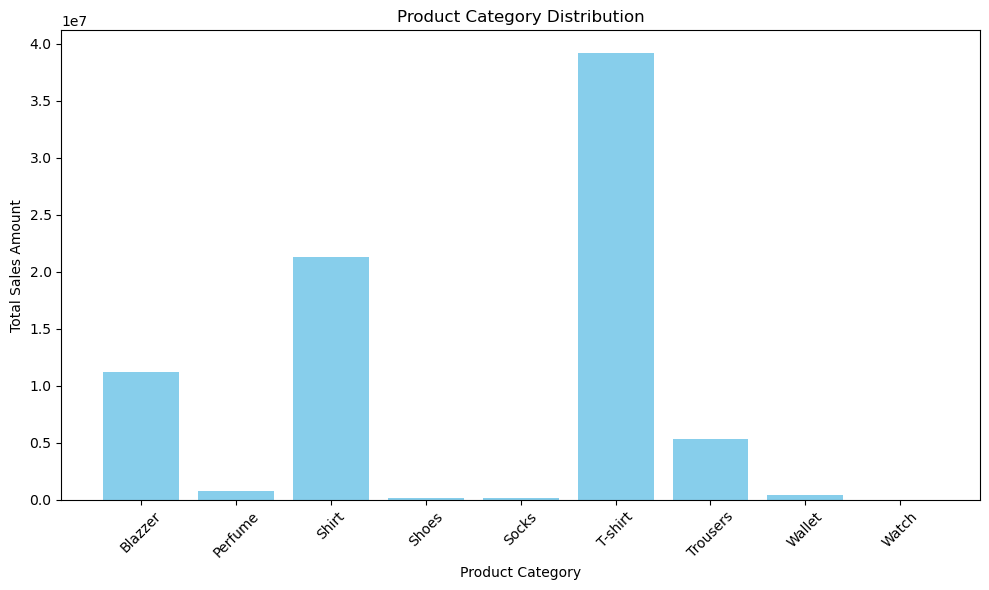

In [23]:
# Group data by 'Category' for product category distribution
category_distribution = df.groupby('Category').agg({'Amount': 'sum'}).reset_index()

# Plot 2: Product Category Distribution
plt.figure(figsize=(10,6))
plt.bar(category_distribution['Category'], category_distribution['Amount'], color='skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visualization shows the Product Category Distribution, indicating which product categories contribute the most to total sales. It helps identify the top-performing categories and areas where sales may be lagging.

##  visualizing insights related to fulfillment methods and geographical sales distribution. 

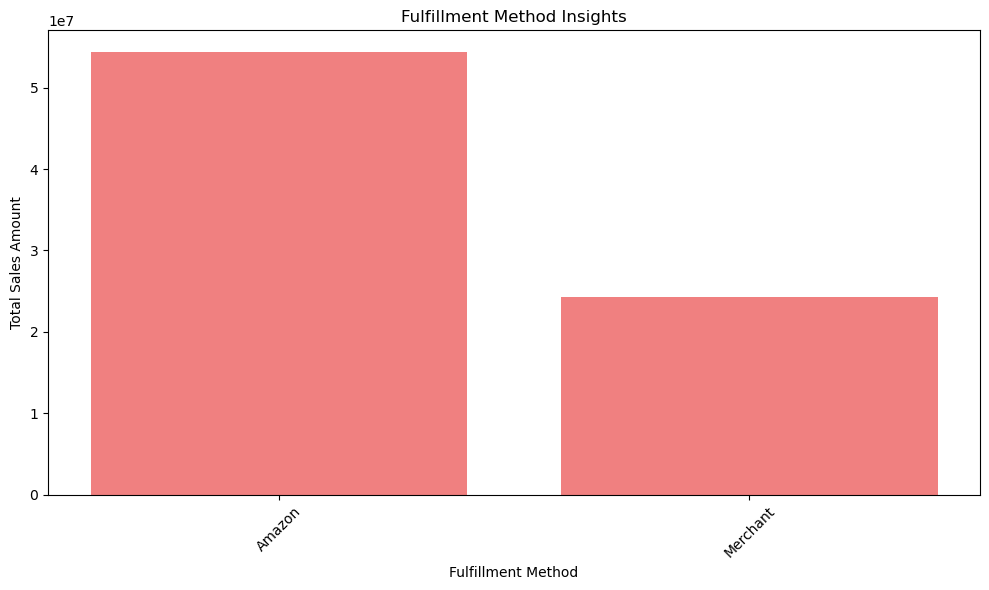

In [24]:
fulfillment_distribution = df.groupby('Fulfilment').agg({'Amount': 'sum'}).reset_index()

# Plot 3: Fulfillment Method Insights
plt.figure(figsize=(10,6))
plt.bar(fulfillment_distribution['Fulfilment'], fulfillment_distribution['Amount'], color='lightcoral')
plt.title('Fulfillment Method Insights')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart provides insights into the Fulfillment Method, showcasing how various methods contribute to total sales. It helps identify whether certain fulfillment approaches (e.g., third-party vs. direct) are more effective.

## Geographical Sales Analysis

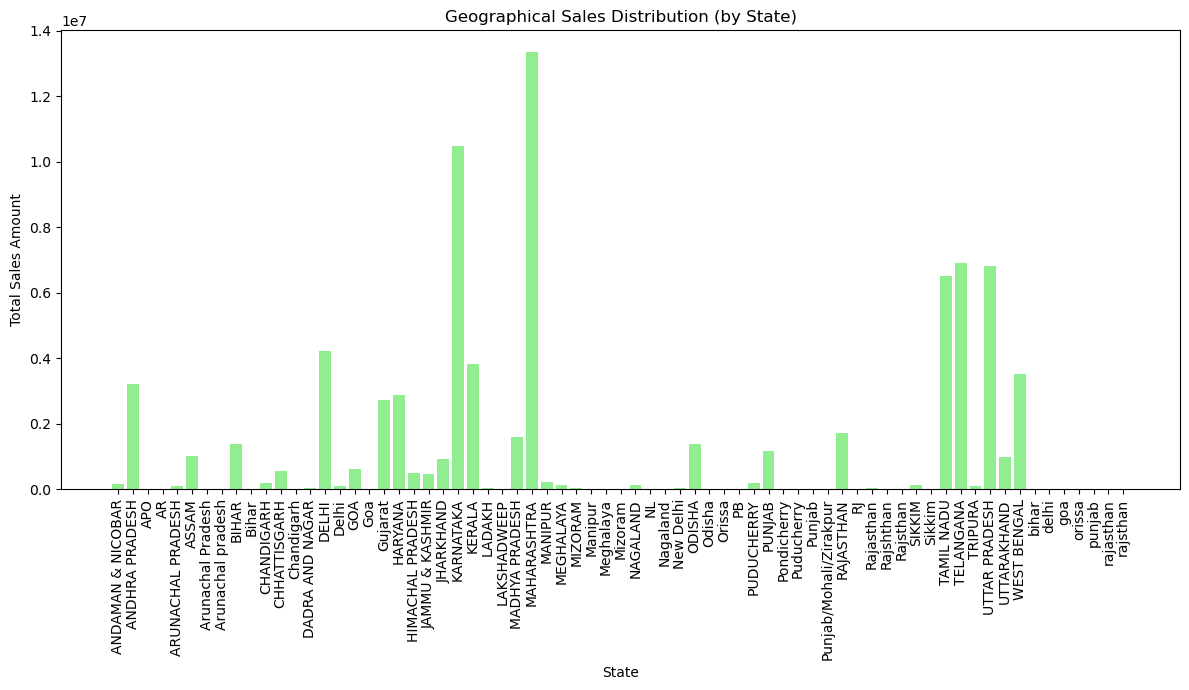

In [25]:
geo_sales = df.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()

# Plot 4: Geographical Sales Distribution
plt.figure(figsize=(12,7))
plt.bar(geo_sales['ship-state'], geo_sales['Amount'], color='lightgreen')
plt.title('Geographical Sales Distribution (by State)')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar chart visualizes the Geographical Sales Distribution by State, helping you understand which regions contribute the most to overall sales. This insight can be useful for tailoring regional marketing strategies or inventory management.